# Cats vs Dogs

Apply different kinds of transformations to generate variations if input images for training the network. The image dataset can be downloaded from here: [Cats_dogs.zip](https://www.dropbox.com/s/butsbcs9lbnw655/cats_dogs.zip?dl=0) (800 MB). Unzip these files locally. Note the particular file structure which keras takes advantage of: `training_set` consist of one folder for every class in our set of output classes and likewise for `test_set`. Using this structure, then keras can do image extraction, resizing and one-hot encoding for us, making aquiring datasets much easier.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Found 25000 images belonging to 2 classes.


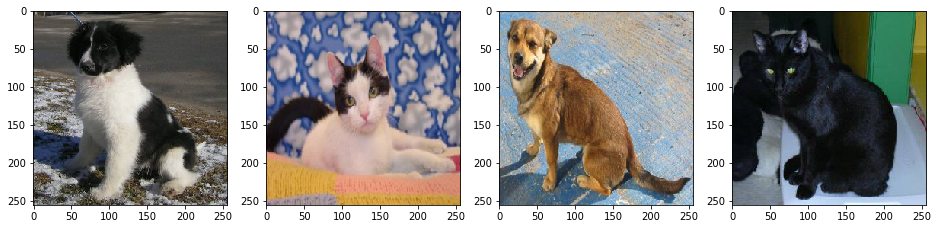

In [4]:
# Much like image augmentation, we can create a 'flow' of images from a directory for us to use.
# This can be used in combination with modifications, or without
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator()

f,ax = plt.subplots(1,4, figsize=(16,4))
for (x,y) in generator.flow_from_directory(directory='../../data/cats_dogs/train', batch_size=4):
    #x = 256-x                     # for some reason, the images here are inverted, so we turn them back
    x=x/256.0
    ax[0].imshow(x[0,:,:,:])
    ax[1].imshow(x[1,:,:,:])
    ax[2].imshow(x[2,:,:,:])
    ax[3].imshow(x[3,:,:,:])
    break
plt.show()

We can add data augmentations to the image generations to create an endless flow of new images to train on. 

Let us now build a CNN that can distinguish between cats and dogs

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense


# we first set up our data stream. This is kindly provided to us by keras if we put our images in 
# the right file structure
train_datagen = ImageDataGenerator(rescale = 1./256,    # feature normalization: all images should be in range [0,1]
                                   shear_range = 0.2,   # shear images by random amount 0-20%
                                   zoom_range = .2,     # zoom images by random amount +/- 20%
                                   horizontal_flip = True) # sometimes perform horizontal flip on images
test_datagen  = ImageDataGenerator(rescale = 1./256)    # test data needs to be scaled the same as our training data


# Initialising the CNN
model = Sequential()

# Step 1 - Convolution (32 filters / feature detectors each having 3x3 dimension)
model.add(Conv2D(8, (3, 3), input_shape = (256, 256,3), activation = 'relu'))

# Step 2 - Pooling (3x3 filter)
model.add(MaxPooling2D(pool_size = (3,3), strides=2))

# Adding a second convolutional layer (32 filters / feature detectors each having 3x3 dimension)
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides=2))

# Step 3 - Flattening (Flatten the previous layers into a one dimensional array to be fed to a ANN)
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


Now we train the networ. **Warning:** Training this network will take a long time (10-30 minutes)

In [5]:

#Load the images from the directory training_set having two sub-folders cats and dogs
training_set = train_datagen.flow_from_directory('../../data/cats_dogs/train',
                                                 target_size = (256, 256), batch_size = 32, class_mode = 'binary')
#Load the images from the directory test_set having two sub-folders cats and dogs
test_set = test_datagen.flow_from_directory('../../data/cats_dogs/train', 
                                            target_size = (256, 256), batch_size = 32, class_mode = 'binary')

validation_data_temp=test_set
model.fit_generator(training_set,
                    steps_per_epoch=300,
                    epochs=15,validation_data=validation_data_temp, validation_steps=len(validation_data_temp))
                    

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
300/300 [==============================] - 399s 1s/step - loss: 0.8920 - acc: 0.5732 - val_loss: 0.6507 - val_acc: 0.6251
Epoch 2/15
300/300 [==============================] - 400s 1s/step - loss: 0.6351 - acc: 0.6441 - val_loss: 0.5868 - val_acc: 0.6840
Epoch 3/15
300/300 [==============================] - 409s 1s/step - loss: 0.5842 - acc: 0.6925 - val_loss: 0.5777 - val_acc: 0.7070
Epoch 4/15
300/300 [==============================] - 434s 1s/step - loss: 0.5527 - acc: 0.7178 - val_loss: 0.5116 - val_acc: 0.7447
Epoch 5/15
300/300 [==============================] - 406s 1s/step - loss: 0.5319 - acc: 0.7340 - val_loss: 0.5021 - val_acc: 0.7522
Epoch 6/15
300/300 [==============================] - 426s 1s/step - loss: 0.5119 - acc: 0.7444 - val_loss: 0.4833 - val_acc: 0.7637
Epoch 7/15
300/300 [==============================] - 473s 2s/step -

** Exercise:** Find an image of a cat online and see if this model can correctly predict it

In [6]:
model.save_weights("model.h5")

The image is that of a  dog


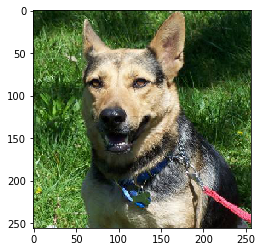

In [10]:
from keras.preprocessing import image
import numpy as np
test_image = image.load_img('./images/42.jpg', target_size = (256, 256))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print("The image is that of a ",prediction)


# Using a pre-trained model

Now we will load and inspect a larger model. This model has been trained on dedicated hardware and would typically be beyond the scope of what one would train on regular laptops.

We first read this using `load_model` and investigate its parts

In [11]:
#from keras.models import load_model
#model = load_model('./model.h5')
#print(model.layers)
#print(model.input)
#print(model.output)

The image is that of a  cat


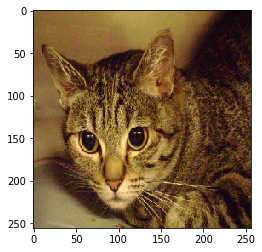

In [13]:
test_image = image.load_img('./images/51.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
plt.imshow(test_image[0,:,:,:]/255.0) # remember that images are reversed

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print("The image is that of a ",prediction)

### Looking at the first layer

We may investigate what this model does to the image by manually applying each convolution operation

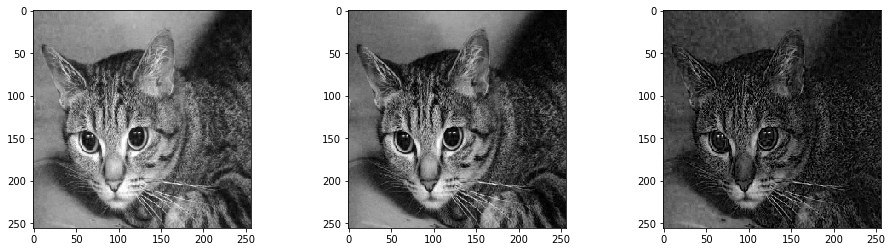

In [14]:
import cv2

f,ax = plt.subplots(1,3, figsize=(16,4))
for i in range(3):
    img = test_image[0,:,:,i]
    img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    ax[i].imshow(img, cmap='gray')
#    cv2.imwrite('layer0-'+str(i)+'.png', img)

(1, 254, 254, 8)


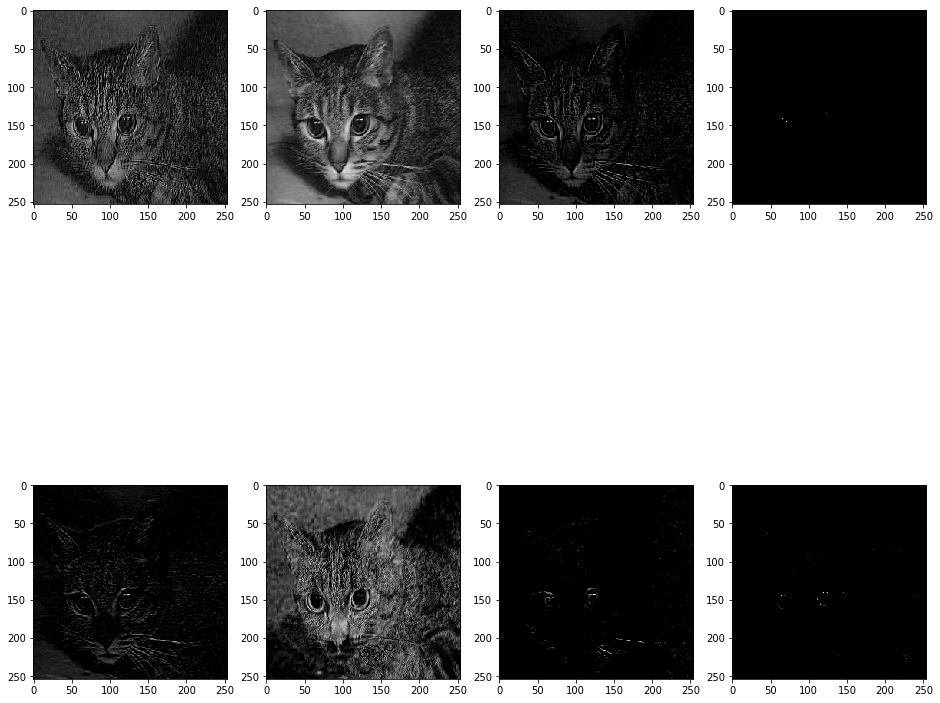

In [15]:
from keras.engine.topology import Input

first = Sequential()
first.add(model.layers[0])
first.compile(optimizer='adam', loss = 'binary_crossentropy')

out = first.predict(test_image)
print(out.shape)
f,ax = plt.subplots(2,4, figsize=(16,16))
for i in range(8):
    img = out[0,:,:,i]
    img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    ax[i//4,i%4].imshow(img, cmap='gray')
#    cv2.imwrite('layer1-'+str(i)+'.png', img)

## Looking at the second layer

(1, 124, 124, 16)


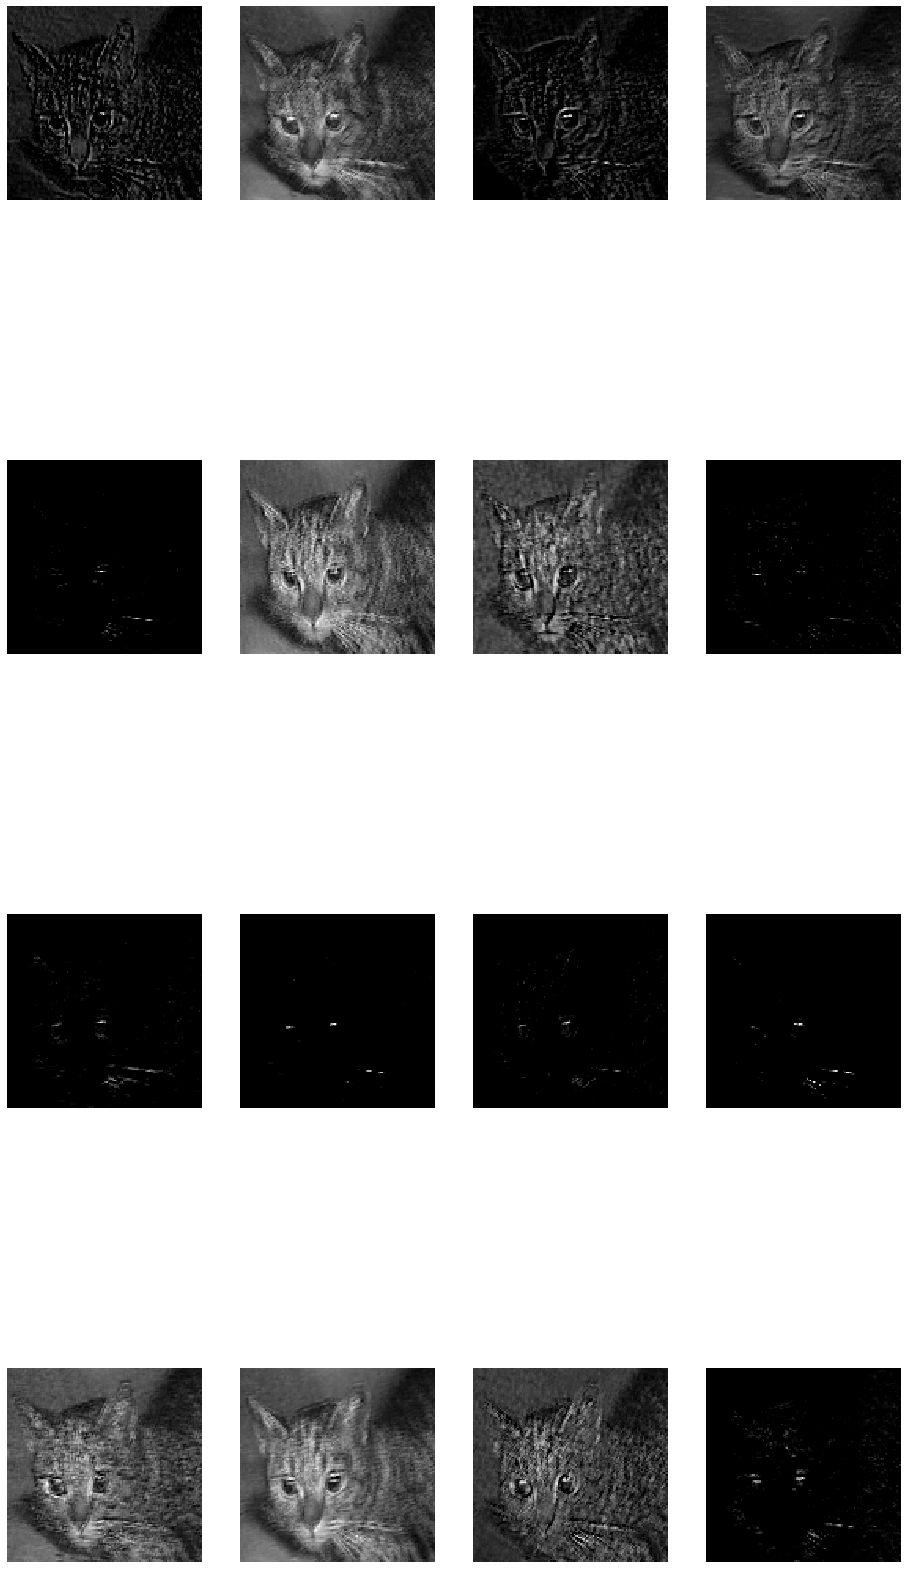

In [16]:
from keras.engine.topology import Input

# print(model.layers[0])
# print(model.layers[1])
# print(model.layers[2])

second = Sequential()
second.add(model.layers[0]) # add 1st conv layer, produces 16 images
second.add(model.layers[1]) # maxpooling: reduce the size all images
second.add(model.layers[2]) # 2nd convolution layer, produces 32 images
second.compile(optimizer='adam', loss = 'binary_crossentropy')

out = second.predict(test_image)

print(out.shape)

f,ax = plt.subplots(4,4, figsize=(16,32))
for i in range(16):
    img = out[0,:,:,i]
    img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    ax[i//4,i%4].imshow(img, cmap='gray')
    ax[i//4,i%4].axis('off')
#    cv2.imwrite('layer2-'+str(i)+'.png', img)

## To do: Use the convolutional neural network to classify hand written digits